In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
from math import fabs
from sklearn.metrics import confusion_matrix

In [44]:
while True:
    noise = np.random.randn(997, 2)
    
    cloud1 = noise
    cloud2 = noise + np.array([randint(-2, 2),randint(-2, 2)])
    cloud3 = noise + np.array([randint(-2, 2),randint(-2, 2)])
    cloud4 = noise + np.array([randint(-2, 2),randint(-2, 2)])
    cloud5 = noise + np.array([randint(-2, 2), randint(-2, 2)])

    X = np.vstack([cloud1, cloud2, cloud3, cloud4, cloud5])

    annot1 = [0] * cloud1.shape[0]
    annot2 = [1] * cloud2.shape[0]
    annot3 = [2] * cloud3.shape[0]
    annot4 = [3] * cloud4.shape[0]
    annot5 = [4] * cloud5.shape[0]
    y = annot1 +annot2 + annot3 + annot4 + annot5

    data, labels = shuffle(X, y)

    test_size = int(len(data) * 0.5)
    Xtrain = data[:test_size]
    Ytrain = labels[:test_size]
    Xtest = data[test_size:]
    Ytest = labels[test_size:]

    clf = LogisticRegression()
    clf.fit(Xtrain, Ytrain)

    predictions = clf.predict(Xtest)

    if accuracy_score(Ytest, predictions)>=0.704:
        if accuracy_score(Ytest, predictions)<=0.716:
            break
accuracy_score(Ytest, predictions)
confusion_matrix(Ytest, predictions)

array([[269,  44,  42,  71,  82],
       [ 56, 376,  68,   1,   1],
       [ 40,  70, 338,  44,   0],
       [ 48,   1,  53, 355,  24],
       [ 63,   1,   1,  24, 421]], dtype=int64)

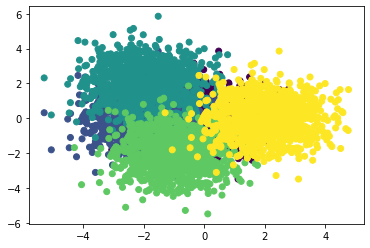

In [10]:
plt.scatter(X[:,0], X[:,1], c=y)

In [11]:
dict = [[],[],[],[],[]]
i = 0 
for element in Xtrain:
    classs = Ytrain[i] 
    dict[classs].append(element) 
    i+=1

In [12]:
sides = []
for cl in dict:
    minX = cl[0][0]
    maxX = cl[0][0]
    minY = cl[0][1]
    maxY = cl[0][1]
    for position in cl:
        if position[0] < minX:
            minX = position[0]
    
        if position[0] > maxX:
            maxX = position[0]
    
        if position[1] < minY:
            minY = position[1]
   
        if position[0] > maxY:
            maxY = position[1]
    temp = []
    temp.extend([minX, maxX, minY, maxY])
    sides.append(temp)

In [13]:
out = []
for cy in range(4):
    out.append([])
MINX = sides[0][0]
MAXX = sides[0][1]
MINY = sides[0][2]
MAXY = sides[0][3]
i = 0
for cl in sides:
    if cl[0]<MINX:
        MINX = cl[0]
        i0 = i
    if cl[1]>MAXX:
        MAXX = cl[1]
        i1 = i
    if cl[2]<MINY:
        MINY = cl[2]
        i2 = i
    if cl[3]>MAXY:
        MAXY = cl[3]
        i3 = i
    i+=1
out[0].extend([MINX, i0])
out[1].extend([MAXX, i1])
out[2].extend([MINY, i2])
out[3].extend([MAXY, i3])

In [27]:
def clf (Xtest, sides, out):
    pred = []
    for test in Xtest:
        count = 0
        while True:
            if count <= len(sides)-1:
                if (test[0]>sides[count][0] and test[0]<sides[count][1] \
                    and test[1]>sides[count][2] and test[1]<sides[count][3]):
                    pred.append(count)
                    break
                    
                else:
                    count+=1

            else:
                if test[0]<out[0][0]:
                    pred.append(out[0][1])
                    break
                if test[0]>out[1][0]:
                    pred.append(out[1][1])
                    break
                if test[1]<out[2][0]:
                    pred.append(out[2][1])
                    break
                if test[1]>out[3][0]:
                    pred.append(out[3][1])
                    break
                if True:
                    pack = []
                    
                    for linear in sides:
                        xd1 = fabs(test[0]-linear[0])
                        xd2 = fabs(test[0]-linear[1])
                        yd1 = fabs(test[1]-linear[2])
                        yd2 = fabs(test[1]-linear[3])

                        tmp = []
                        tmp.extend([xd1, xd2, yd1, yd2])
                        
                        min = xd1
                        for element in tmp:
                            if element < min:
                                min = element
                        pack.append(min)
                    c = 0
                    p = 0
                    mn = pack[0]
                    for elmnt in pack:
                        if elmnt < mn:
                            mn = elmnt
                            p = c 
                            c +=1
                    pred.append(p)
                    break
    return (pred)

In [28]:
predict = clf(Xtest, sides, out)

In [42]:
print(accuracy_score(Ytest, predict)*100, '%')

44.28399518652226 %


In [33]:
def evaluate(P, T):
    accuracy = np.mean(P == T)
    print(accuracy*100, '%')

In [46]:
confusion_matrix(predict, Ytest)

array([[354, 336, 339, 332, 370],
       [ 39,  40,  29,  33,  43],
       [ 86,  99,  96,  87,  72],
       [ 10,   7,  11,   7,   5],
       [ 19,  20,  17,  22,  20]], dtype=int64)

In [47]:
confusion_matrix(predictions, Ytest)

array([[269,  56,  40,  48,  63],
       [ 44, 376,  70,   1,   1],
       [ 42,  68, 338,  53,   1],
       [ 71,   1,  44, 355,  24],
       [ 82,   1,   0,  24, 421]], dtype=int64)

In [41]:
evaluate(p, Ytest)

44.28399518652226 %
